In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import seaborn as sns

In [ ]:
!pip install koreanize_matplotlib
import matplotlib.pyplot as plt
import koreanize_matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 24.2 MB/s eta 0:00:00


In [ ]:
# 가능한 font list 확인
import matplotlib.font_manager as fm
f = [f.name for f in fm.fontManager.ttflist]
print(f)
# 확인 이후
plt.rc('font', family='NanumGothic')

['cmex10', 'STIXSizeOneSym', 'STIXSizeOneSym', 'DejaVu Serif', 'STIXGeneral', 'STIXSizeFiveSym', 'DejaVu Sans', 'STIXGeneral', 'DejaVu Serif', 'DejaVu Serif Display', 'STIXGeneral', 'STIXSizeTwoSym', 'STIXGeneral', 'DejaVu Serif', 'STIXNonUnicode', 'cmtt10', 'STIXSizeThreeSym', 'cmsy10', 'STIXNonUnicode', 'cmb10', 'cmmi10', 'DejaVu Sans', 'STIXSizeThreeSym', 'STIXNonUnicode', 'DejaVu Sans Mono', 'STIXSizeTwoSym', 'DejaVu Sans', 'STIXSizeFourSym', 'DejaVu Sans Display', 'DejaVu Sans', 'DejaVu Sans Mono', 'STIXNonUnicode', 'cmss10', 'STIXSizeFourSym', 'cmr10', 'DejaVu Sans Mono', 'DejaVu Sans Mono', 'DejaVu Serif', 'Liberation Serif', 'Liberation Serif', 'Liberation Sans', 'Liberation Sans Narrow', 'Liberation Mono', 'Humor Sans', 'Liberation Sans', 'Liberation Sans Narrow', 'Liberation Mono', 'Liberation Sans Narrow', 'Liberation Mono', 'Liberation Serif', 'Liberation Sans', 'Liberation Sans', 'Liberation Sans Narrow', 'Liberation Serif', 'Liberation Mono', 'NanumGothic', 'NanumGothic',

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 데이터 전처리

In [ ]:
df_earned = pd.read_csv('/content/drive/MyDrive/DSL/EDA/df_earned_23.csv')
df_closed = pd.read_csv('/content/drive/MyDrive/DSL/EDA/df_closed_23.csv')

In [ ]:
# 공통열 (분기, 자치구, 업종) 기준으로 매출, 폐업 데이터 병합

df_sum = pd.merge(df_earned, df_closed, how = 'inner')
df_sum

,기준_년분기_코드,자치구_코드,자치구_코드_명,서비스_업종_코드,서비스_업종_코드_명,당월_매출_금액,당월_매출_건수,주중_매출_금액,주말_매출_금액,월요일_매출_금액,...,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,점포_수,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수
0,20191,11110,종로구,CS100004,식당,21733503173,586239,15141392928,6592110245,2473306312,...,90539,62719,22943,468.0,516.0,4.7,24.0,3.5,18.0,48.0
1,20191,11110,종로구,CS100007,식당,3247811505,111086,2414124197,833687308,387818146,...,20359,16465,5826,49.0,142.0,4.2,6.0,4.9,7.0,93.0
2,20191,11110,종로구,CS200006,필수의료,14993800118,538455,13153901584,1839898534,2847348305,...,124040,115864,100169,179.0,179.0,3.9,7.0,3.4,6.0,0.0
3,20191,11110,종로구,CS300018,소매(의료),33876865110,1253099,27361722154,6515142956,5327028136,...,246369,250351,313652,262.0,274.0,3.6,10.0,1.1,3.0,12.0
4,20191,11110,종로구,CS300019,소매(의료),9397765181,99260,7877465392,1520299789,1299088550,...,12205,20169,54927,101.0,101.0,2.0,2.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29225,20241,11740,강동구,CS300006,소매(식품),2751818273,105163,2123970081,627848192,339186061,...,12137,28768,55830,111.0,111.0,0.0,0.0,3.6,4.0,0.0
29226,20241,11740,강동구,CS300007,소매(식품),21093427651,640196,15746059569,5347368082,2309827966,...,111300,171173,275979,228.0,229.0,2.2,5.0,2.6,6.0,1.0
29227,20241,11740,강동구,CS300011,소매(의류),33713831412,538479,19665382420,14048448992,3269568739,...,124128,162625,167325,966.0,971.0,0.8,8.0,2.8,27.0,5.0
29228,20241,11740,강동구,CS300029,반려동물,570271711,24614,388450272,181821439,83222879,...,5025,6526,6861,122.0,124.0,11.3,14.0,3.2,4.0,2.0


In [ ]:
# z-표준화

df_sum_scale = df_sum.copy()


from sklearn.preprocessing import StandardScaler

# 수치형 컬럼과 범주형 컬럼 분리
numeric_cols = df_sum_scale.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df_sum_scale.select_dtypes(include=['object']).columns

# 표준화에서 제외할 수치형 컬럼 지정
exclude_cols = ['자치구_코드', '기준_년분기_코드']

# 표준화할 수치형 컬럼 선택 (제외할 컬럼 제외)
standardize_cols = [col for col in numeric_cols if col not in exclude_cols]

# 수치형 컬럼만 Z-표준화
scaler = StandardScaler()
df_sum_scale[standardize_cols] = scaler.fit_transform(df_sum_scale[standardize_cols])



df_sum_scale.head()

,기준_년분기_코드,자치구_코드,자치구_코드_명,서비스_업종_코드,서비스_업종_코드_명,당월_매출_금액,당월_매출_건수,주중_매출_금액,주말_매출_금액,월요일_매출_금액,...,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,점포_수,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수
0,20191,11110,종로구,CS100004,식당,0.115985,-0.021624,0.080464,0.179930,0.015086,...,-0.098904,-0.174310,-0.244721,0.227445,0.246117,0.706591,0.442016,0.387256,0.425687,0.209976
1,20191,11110,종로구,CS100007,식당,-0.278241,-0.318236,-0.287660,-0.210063,-0.302090,...,-0.320512,-0.354674,-0.311214,-0.458830,-0.346887,0.505036,-0.198447,1.040182,-0.147300,0.787616
2,20191,11110,종로구,CS200006,필수의료,-0.027746,-0.051453,0.022978,-0.141916,0.071973,...,0.006882,0.032924,0.055273,-0.245904,-0.288221,0.384103,-0.162866,0.340619,-0.199390,-0.406174
3,20191,11110,종로구,CS300018,소매(의료),0.374955,0.394660,0.433926,0.174717,0.449100,...,0.393161,0.557344,0.884575,-0.109960,-0.137592,0.263169,-0.056122,-0.732045,-0.355659,-0.252137
4,20191,11110,종로구,CS300019,소매(의료),-0.147087,-0.325618,-0.129638,-0.163561,-0.163498,...,-0.346260,-0.340230,-0.120475,-0.373660,-0.411896,-0.381808,-0.340772,-0.778683,-0.459838,-0.406174


In [ ]:
# 업종 원핫인코딩

df_encoded = pd.get_dummies(df_sum_scale, columns = ['서비스_업종_코드_명'], drop_first=True, dtype=int)
df_encoded.head()

,기준_년분기_코드,자치구_코드,자치구_코드_명,서비스_업종_코드,당월_매출_금액,당월_매출_건수,주중_매출_금액,주말_매출_금액,월요일_매출_금액,화요일_매출_금액,...,서비스_업종_코드_명_소매(의류),서비스_업종_코드_명_소매(전자제품),서비스_업종_코드_명_숙박업,서비스_업종_코드_명_스포츠/여가,서비스_업종_코드_명_식당,서비스_업종_코드_명_전자제품 관련 서비스,서비스_업종_코드_명_주점,서비스_업종_코드_명_차량 관련 서비스,서비스_업종_코드_명_카페 및 베이커리,서비스_업종_코드_명_필수의료
0,20191,11110,종로구,CS100004,0.115985,-0.021624,0.080464,0.179930,0.015086,0.049700,...,0,0,0,0,1,0,0,0,0,0
1,20191,11110,종로구,CS100007,-0.278241,-0.318236,-0.287660,-0.210063,-0.302090,-0.290132,...,0,0,0,0,1,0,0,0,0,0
2,20191,11110,종로구,CS200006,-0.027746,-0.051453,0.022978,-0.141916,0.071973,-0.003342,...,0,0,0,0,0,0,0,0,0,1
3,20191,11110,종로구,CS300018,0.374955,0.394660,0.433926,0.174717,0.449100,0.394239,...,0,0,0,0,0,0,0,0,0,0
4,20191,11110,종로구,CS300019,-0.147087,-0.325618,-0.129638,-0.163561,-0.163498,-0.162711,...,0,0,0,0,0,0,0,0,0,0


# VIF 확인

In [ ]:
# 독립변수만 추출
df_vif = df_encoded.drop(columns= ['기준_년분기_코드',	'자치구_코드',	'자치구_코드_명',	'서비스_업종_코드'])

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame([variance_inflation_factor(df_vif.iloc[:,:-1].values, i) for i in range(df_vif.iloc[:,:-1].shape[1])], index = df_vif.iloc[:,:-1].columns)
vif.reset_index(inplace = True)
vif.columns = ['Feature', 'VIFscore']
vif

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Feature,VIFscore
0,당월_매출_금액,inf
1,당월_매출_건수,inf
2,주중_매출_금액,inf
3,주말_매출_금액,inf
4,월요일_매출_금액,inf
...,...,...
71,서비스_업종_코드_명_식당,1.689180
72,서비스_업종_코드_명_전자제품 관련 서비스,1.025370
73,서비스_업종_코드_명_주점,1.432229
74,서비스_업종_코드_명_차량 관련 서비스,1.040724


In [ ]:
vif[vif['VIFscore'] > 10]

/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Feature,VIFscore
0,당월_매출_금액,inf
1,당월_매출_건수,inf
2,주중_매출_금액,inf
3,주말_매출_금액,inf
4,월요일_매출_금액,inf
5,화요일_매출_금액,inf
6,수요일_매출_금액,inf
7,목요일_매출_금액,inf
8,금요일_매출_금액,inf
9,토요일_매출_금액,inf


매출, 점포수 변수들 간 다중공선성 강하게 의심.

In [ ]:
vif[vif['VIFscore'] < 10]

,Feature,VIFscore
50,개업_율,1.648187
51,개업_점포_수,2.738967
52,폐업_률,1.582360
53,폐업_점포_수,8.360387
55,서비스_업종_코드_명_미용,1.039050
56,서비스_업종_코드_명_반려동물,1.041133
57,서비스_업종_코드_명_부동산,1.130139
58,서비스_업종_코드_명_소매(가구),1.092871
59,서비스_업종_코드_명_소매(미용),1.370513
60,서비스_업종_코드_명_소매(생활),3.805163


업종 간의 다중공선성은 없는 것으로 추정.

개업률, 개업 점포수, 폐업률, 폐업 점포수 간의 다중공선성도 없는 것으로 추정.

# 차원축소 1) t-sne

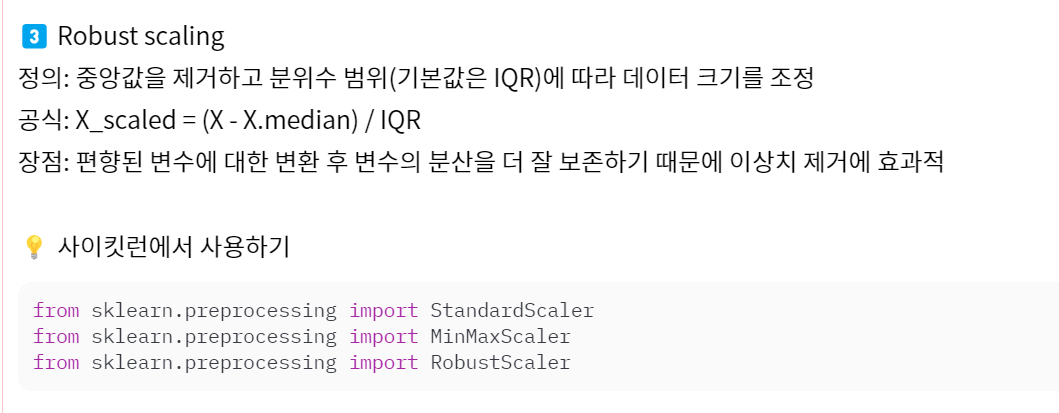

In [ ]:
# robust 스케일링

df_sum_scale = df_sum.copy()


from sklearn.preprocessing import RobustScaler

# 수치형 컬럼과 범주형 컬럼 분리
numeric_cols = df_sum_scale.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df_sum_scale.select_dtypes(include=['object']).columns

# 표준화에서 제외할 수치형 컬럼 지정
exclude_cols = ['자치구_코드', '기준_년분기_코드']

# 표준화할 수치형 컬럼 선택 (제외할 컬럼 제외)
scailing_cols = [col for col in numeric_cols if col not in exclude_cols]

# 수치형 컬럼만 scailing
scaler = RobustScaler()
df_sum_scale[scailing_cols] = scaler.fit_transform(df_sum_scale[scailing_cols])



df_sum_scale.head()

,기준_년분기_코드,자치구_코드,자치구_코드_명,서비스_업종_코드,서비스_업종_코드_명,당월_매출_금액,당월_매출_건수,주중_매출_금액,주말_매출_금액,월요일_매출_금액,...,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,점포_수,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수
0,20191,11110,종로구,CS100004,식당,1.379237,1.200776,1.255885,1.977324,1.027061,...,0.998212,0.688526,0.263530,1.389381,1.276515,0.709677,2.0,0.48,1.750,2.25
1,20191,11110,종로구,CS100007,식당,-0.107439,0.049336,-0.104628,-0.085944,-0.143886,...,0.032715,-0.013384,-0.087823,-0.464602,-0.140152,0.548387,0.2,1.04,0.375,4.50
2,20191,11110,종로구,CS200006,필수의료,0.837209,1.084981,1.043427,0.274586,1.237076,...,1.459099,1.495009,1.848709,0.110619,0.000000,0.451613,0.3,0.44,0.250,-0.15
3,20191,11110,종로구,CS300018,소매(의료),2.355844,2.816781,2.562207,1.949746,2.629351,...,3.142032,3.535868,6.230769,0.477876,0.359848,0.354839,0.6,-0.48,-0.125,0.45
4,20191,11110,종로구,CS300019,소매(의료),0.387159,0.020678,0.479389,0.160072,0.367769,...,-0.079463,0.042824,0.920049,-0.234513,-0.295455,-0.161290,-0.2,-0.52,-0.375,-0.15


In [ ]:
# 독립변수만 추출
df_X = df_sum_scale.drop(columns= ['서비스_업종_코드_명','기준_년분기_코드',	'자치구_코드',	'자치구_코드_명',	'서비스_업종_코드'])
df_X

,당월_매출_금액,당월_매출_건수,주중_매출_금액,주말_매출_금액,월요일_매출_금액,화요일_매출_금액,수요일_매출_금액,목요일_매출_금액,금요일_매출_금액,토요일_매출_금액,...,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,점포_수,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수
0,1.379237,1.200776,1.255885,1.977324,1.027061,1.160781,1.269747,1.429699,1.381682,1.724192,...,0.998212,0.688526,0.263530,1.389381,1.276515,0.709677,2.0,0.48,1.750,2.25
1,-0.107439,0.049336,-0.104628,-0.085944,-0.143886,-0.102788,-0.105656,-0.079966,-0.069432,-0.105165,...,0.032715,-0.013384,-0.087823,-0.464602,-0.140152,0.548387,0.2,1.04,0.375,4.50
2,0.837209,1.084981,1.043427,0.274586,1.237076,0.963561,0.806410,1.110388,1.115582,0.637759,...,1.459099,1.495009,1.848709,0.110619,0.000000,0.451613,0.3,0.44,0.250,-0.15
3,2.355844,2.816781,2.562207,1.949746,2.629351,2.441850,2.499192,2.831901,2.420837,2.500528,...,3.142032,3.535868,6.230769,0.477876,0.359848,0.354839,0.6,-0.48,-0.125,0.45
4,0.387159,0.020678,0.479389,0.160072,0.367769,0.370994,0.625743,0.513629,0.527956,0.334091,...,-0.079463,0.042824,0.920049,-0.234513,-0.295455,-0.161290,-0.2,-0.52,-0.375,-0.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29225,-0.147329,0.034983,-0.135645,-0.159697,-0.171191,-0.097818,-0.151409,-0.101455,-0.131221,-0.043559,...,-0.080398,0.173315,0.938585,-0.190265,-0.257576,-0.806452,-0.4,0.52,0.000,-0.15
29226,1.327760,1.331530,1.320522,1.531327,0.935272,1.292312,1.214932,1.743929,1.402696,1.469758,...,1.283830,2.334331,5.457474,0.327434,0.189394,-0.096774,0.1,0.12,0.250,-0.10
29227,2.342732,1.085039,1.739488,4.648962,1.474142,1.371046,1.712780,1.666870,2.405064,3.863166,...,1.460310,2.204614,3.227187,3.592920,3.000000,-0.548387,0.4,0.20,2.875,0.10
29228,-0.322776,-0.160212,-0.321167,-0.319511,-0.314908,-0.321010,-0.308872,-0.315768,-0.316979,-0.324541,...,-0.178241,-0.164210,-0.066578,-0.141593,-0.208333,2.838710,1.0,0.36,0.000,-0.05


In [ ]:
df_Y = df_sum_scale['서비스_업종_코드_명']

저장

In [ ]:
df_sum_scale.to_csv('/content/drive/MyDrive/DSL/EDA/df_sum_scale')
df_X.to_csv('/content/drive/MyDrive/DSL/EDA/df_X')
df_Y.to_csv('/content/drive/MyDrive/DSL/EDA/df_Y')

tsne 실행: 변수 3개로 축소

In [ ]:
from sklearn.manifold import TSNE

new_tsne=TSNE(n_components=3, random_state=1 , perplexity=30).fit_transform(df_X)

In [ ]:
# numpy array -> DataFrame 변환
tsne_df = pd.DataFrame(new_tsne, columns = ['component 0', 'component 1', 'component 2'])

tsne_df

,component 0,component 1,component 2
0,6.058114,29.425381,1.700627
1,23.217596,-0.059840,16.992432
2,6.762330,-7.171261,-25.668642
3,11.704678,2.745134,-26.771730
4,0.509664,-12.326306,-16.202271
...,...,...,...
29225,5.377680,-2.786426,3.879119
29226,9.163024,7.656155,-17.041195
29227,-6.451857,19.056894,-20.782587
29228,-23.767977,8.734711,14.416748


저장 (tsne_df)

In [ ]:
tsne_df['업종'] = df_Y.values

In [ ]:
tsne_df

,component 0,component 1,component 2,업종
0,6.058114,29.425380,1.700627,식당
1,23.217596,-0.059840,16.992432,식당
2,6.762330,-7.171261,-25.668642,필수의료
3,11.704678,2.745134,-26.771730,소매(의료)
4,0.509664,-12.326306,-16.202270,소매(의료)
...,...,...,...,...
29225,5.377680,-2.786426,3.879119,소매(식품)
29226,9.163024,7.656155,-17.041195,소매(식품)
29227,-6.451857,19.056894,-20.782587,소매(의류)
29228,-23.767977,8.734711,14.416748,반려동물


tsne 시각화 (3차원 그래프에서 업종별로)

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:1080: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


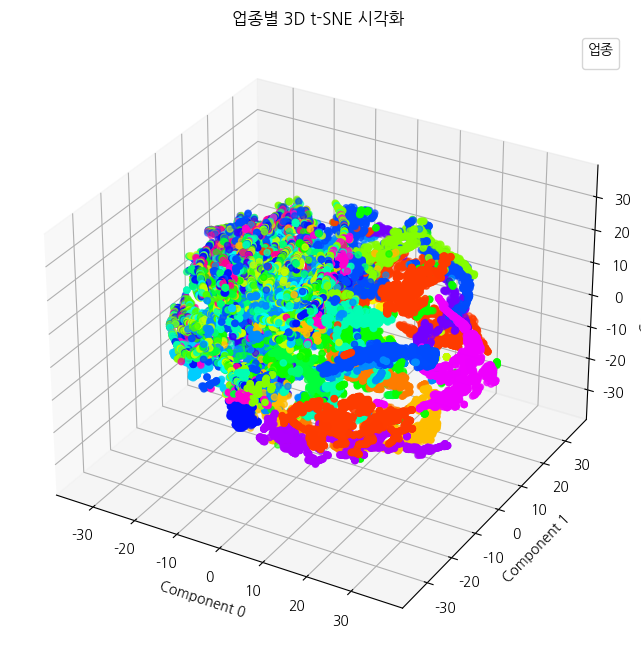

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D


# 업종을 색상으로 매핑하기 위해 seaborn의 color palette 사용
unique_categories = tsne_df['업종'].unique()
palette = sns.color_palette('hsv', len(unique_categories))
color_map = dict(zip(unique_categories, palette))

# 각 데이터 포인트에 맞는 색상 지정
colors = tsne_df['업종'].map(color_map)

# 3D scatter plot 생성
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(tsne_df['component 0'], tsne_df['component 1'], tsne_df['component 2'],
                     c=colors, marker='o')

# 축 레이블 설정
ax.set_xlabel('Component 0')
ax.set_ylabel('Component 1')
ax.set_zlabel('Component 2')

# 범례 추가
handles, labels = scatter.legend_elements(prop="colors", alpha=0.6)
legend_labels = [unique_categories[i] for i in range(len(labels))]
legend = ax.legend(handles, legend_labels, loc="upper right", title="업종")

plt.title('업종별 3D t-SNE 시각화')
plt.show()

축소된 3개 변수 관점에서 업종이 제대로 분류되지 못함을 알 수 있음.

## 클러스터링 (K-means)

In [ ]:
tsne_df = pd.read_csv('/content/drive/MyDrive/DSL/EDA/tsne.csv')

1) 군집 수: 5

In [ ]:
from sklearn.cluster import KMeans

# K-means 클러스터링
kmeans = KMeans(n_clusters= 5, random_state=42)
tsne_df['Cluster'] = kmeans.fit_predict(tsne_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


실루엣 계수 성능평가

In [ ]:



0.2654127035453008

Silhouette Score: 0.2654127035453008


실루엣 계수: -1 ~ 1 사이의 값, 1에 가깝게 나와야 좋음. 많이 낮은 성능 확인.

다빈도 비율 성능평가

In [ ]:
from sklearn.metrics import davies_bouldin_score

db_index = davies_bouldin_score(tsne_df[['component 0', 'component 1', 'component 2']], tsne_df['Cluster'])
print(f'Davies-Bouldin Index: {db_index}')

Davies-Bouldin Index: 1.1161410331828634


다빈도 비율: 0에서 무한대 값. 1을 넘으면 품질 안좋다고 판단. 낮은 성능 확인

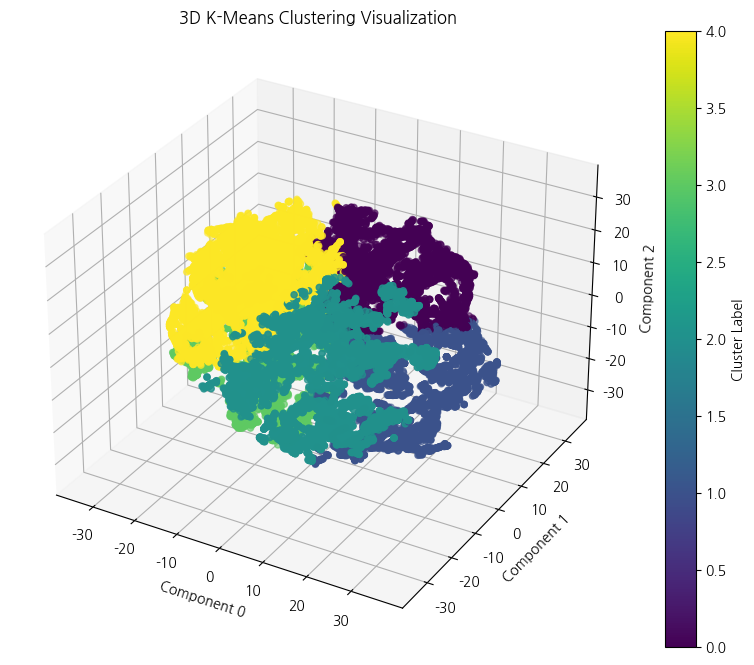

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 3D 시각화를 위한 색상 설정
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 각 클러스터별로 색상을 달리하여 시각화
scatter = ax.scatter(tsne_df['component 0'], tsne_df['component 1'], tsne_df['component 2'],
                     c=tsne_df['Cluster'], cmap='viridis', marker='o')

# 축 레이블 설정
ax.set_xlabel('Component 0')
ax.set_ylabel('Component 1')
ax.set_zlabel('Component 2')

# 컬러 바 추가
plt.colorbar(scatter, ax=ax, label='Cluster Label')

plt.title('3D K-Means Clustering Visualization')
plt.show()


2) 군집 수: 4

In [ ]:
tsne_df = pd.read_csv('/content/drive/MyDrive/DSL/EDA/tsne.csv')

In [ ]:
from sklearn.cluster import KMeans

# K-means 클러스터링
kmeans = KMeans(n_clusters= 4, random_state=42)
tsne_df['Cluster'] = kmeans.fit_predict(tsne_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(tsne_df[['component 0', 'component 1', 'component 2']], tsne_df['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.272698586600139


비슷하게 낮은 수치

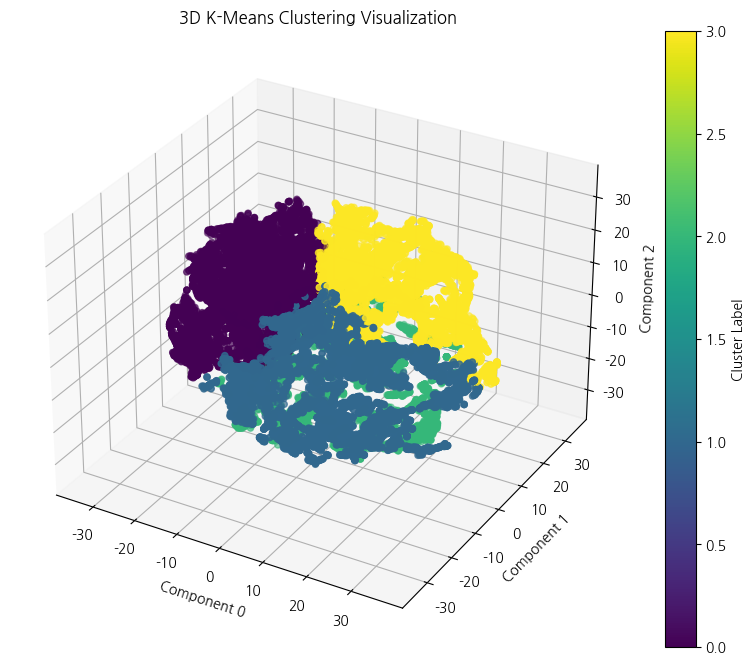

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 3D 시각화를 위한 색상 설정
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 각 클러스터별로 색상을 달리하여 시각화
scatter = ax.scatter(tsne_df['component 0'], tsne_df['component 1'], tsne_df['component 2'],
                     c=tsne_df['Cluster'], cmap='viridis', marker='o')

# 축 레이블 설정
ax.set_xlabel('Component 0')
ax.set_ylabel('Component 1')
ax.set_zlabel('Component 2')

# 컬러 바 추가
plt.colorbar(scatter, ax=ax, label='Cluster Label')

plt.title('3D K-Means Clustering Visualization')
plt.show()


시각화 예시 (특정 업종만 선택해봤을 때)

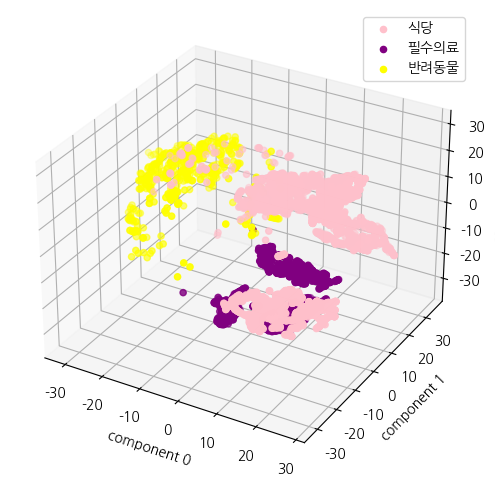

In [ ]:
# 시각화 2)

from mpl_toolkits.mplot3d import Axes3D

# 3차원 그래프 세팅
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')

# class target 정보 불러오기
tsne_df['target'] = df_sum_scale['서비스_업종_코드_명']

# target 별 분리
tsne_df_0 = tsne_df[tsne_df['target'] == '식당']
tsne_df_1 = tsne_df[tsne_df['target'] == '필수의료']
tsne_df_2 = tsne_df[tsne_df['target'] == '반려동물']

# target 별 시각화
ax.scatter(tsne_df_0['component 0'], tsne_df_0['component 1'], tsne_df_0['component 2'], color = 'pink', label = '식당')
ax.scatter(tsne_df_1['component 0'], tsne_df_1['component 1'], tsne_df_1['component 2'], color = 'purple', label = '필수의료')
ax.scatter(tsne_df_2['component 0'], tsne_df_2['component 1'], tsne_df_2['component 2'], color = 'yellow', label = '반려동물')

ax.set_xlabel('component 0')
ax.set_ylabel('component 1')
ax.set_zlabel('component 2')
ax.legend()
plt.show()

## 클러스터링 (GMM)

In [ ]:
tsne_df = pd.read_csv('/content/drive/MyDrive/DSL/EDA/tsne.csv')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler


# GMM 모델 학습 및 예측 (예: 클러스터 수 5개)
gmm = GaussianMixture(n_components=5, random_state=42)
gmm.fit(tsne_df)
tsne_df['gmm_cluster'] = gmm.predict(tsne_df)


In [ ]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(tsne_df[['component 0', 'component 1', 'component 2']], tsne_df['gmm_cluster'])
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.23157204045818888


군집 수 5일 때 가장 높으나 성능이 안좋음.

# 차원축소 2) umap

비모수적 기법. 다중공선성 높은 대규모 데이터셋에 적합. t-sne보다 일반적으로 높은 성능.

In [ ]:
pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 1.8 MB/s eta 0:00:00


In [ ]:
import umap
import matplotlib.pyplot as plt

## 클러스터링 (K-means) : 채택

주성분 4개, 클러스터 5개일 때 성능 가장 높음 0.39

In [ ]:
# UMAP 모델 생성 및 학습
umap_model = umap.UMAP(n_components=4, random_state=42)
X_umap = umap_model.fit_transform(df_X)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [ ]:
# numpy array -> DataFrame 변환
umap_df1 = pd.DataFrame(X_umap, columns = ['component 0', 'component 1', 'component 2', 'component 3'])

In [ ]:
from sklearn.cluster import KMeans

# K-means 클러스터링
kmeans = KMeans(n_clusters= 5, random_state=42)
umap_df1['Cluster'] = kmeans.fit_predict(umap_df1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
# 실루엣 계수로 클러스터링 성능평가

from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(umap_df1[['component 0', 'component 1', 'component 2', 'component 3']], umap_df1['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.39271265268325806


클러스터링 성능이 높진 않으나 t-sne보다 개선됨.

0.7 ~ 1: 클러스터링이 잘 수행되었으며, 클러스터 간의 구분이 명확합니다.

0.5 ~ 0.7: 클러스터링이 꽤 잘 되었지만, 개선의 여지가 있을 수 있습니다.

0.25 ~ 0.5: 클러스터링 결과가 평균적이며, 클러스터 간의 경계가 불명확하거나 혼잡할 수 있습니다.

0 이하: 클러스터링이 부적절하며, 데이터 포인트가 잘못된 클러스터에 배정된 경우가 많습니다.

In [ ]:
# 저장
umap_df1.to_csv('/content/drive/MyDrive/DSL/EDA/umap.csv')

시각화

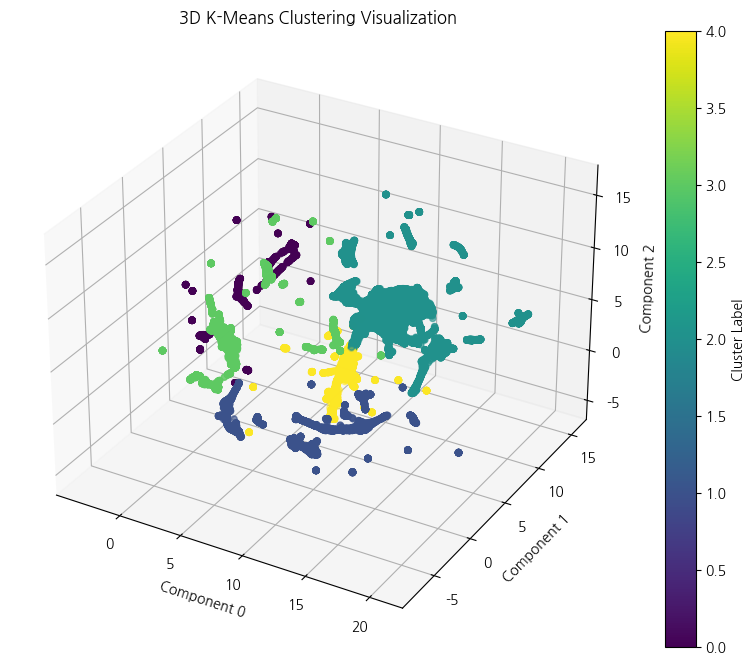

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 3D 시각화를 위한 색상 설정
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 각 클러스터별로 색상을 달리하여 시각화
scatter = ax.scatter(umap_df2['component 0'], umap_df2['component 1'], umap_df2['component 2'],
                     c= umap_df2['Cluster'], cmap='viridis', marker='o')

# 축 레이블 설정
ax.set_xlabel('Component 0')
ax.set_ylabel('Component 1')
ax.set_zlabel('Component 2')

# 컬러 바 추가
plt.colorbar(scatter, ax=ax, label='Cluster Label')

plt.title('3D K-Means Clustering Visualization')
plt.show()

### 업종 최종 분류

업종별로 어떤 클러스터에 가장 많이 분류되었는지 main cluster 계산 후 이를 기준으로 업종 분류

In [ ]:
umap_df1 = pd.read_csv('/content/drive/MyDrive/DSL/EDA/umap.csv', index_col=0)
umap_df1

,component 0,component 1,component 2,component 3,Cluster
0,15.363150,1.149979,2.761172,4.438891,4
1,9.781116,-1.786725,3.331764,13.469693,3
2,8.065572,4.695636,0.831932,-4.011355,2
3,8.110211,5.788886,1.766639,-4.738430,2
4,11.595430,5.575772,6.119947,3.244096,1
...,...,...,...,...,...
29225,11.740160,7.022519,3.782607,3.396413,4
29226,12.939969,4.667572,1.810059,-0.739875,2
29227,9.339284,3.894099,10.616091,-1.216581,1
29228,13.065639,7.677095,4.488766,9.728284,4


In [ ]:
df_X = pd.read_csv('/content/drive/MyDrive/DSL/EDA/df_X', index_col=0)
df_Y = pd.read_csv('/content/drive/MyDrive/DSL/EDA/df_Y', index_col=0)

In [ ]:
# 클러스터링 결과와 타겟 변수 결합
df_kmeans = df_X
df_kmeans['Target'] = df_Y
df_kmeans['Cluster'] = umap_df1['Cluster']

df_kmeans.head(3)

,당월_매출_금액,당월_매출_건수,주중_매출_금액,주말_매출_금액,월요일_매출_금액,화요일_매출_금액,수요일_매출_금액,목요일_매출_금액,금요일_매출_금액,토요일_매출_금액,...,연령대_60_이상_매출_건수,점포_수,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수,Target,Cluster
0,1.379237,1.200776,1.255885,1.977324,1.027061,1.160781,1.269747,1.429699,1.381682,1.724192,...,0.263530,1.389381,1.276515,0.709677,2.0,0.48,1.750,2.25,식당,4
1,-0.107439,0.049336,-0.104628,-0.085944,-0.143886,-0.102788,-0.105656,-0.079966,-0.069432,-0.105165,...,-0.087823,-0.464602,-0.140152,0.548387,0.2,1.04,0.375,4.50,식당,3
2,0.837209,1.084981,1.043427,0.274586,1.237076,0.963561,0.806410,1.110388,1.115582,0.637759,...,1.848709,0.110619,0.000000,0.451613,0.3,0.44,0.250,-0.15,필수의료,2


In [ ]:
# 클러스터별 타겟 변수 분포 확인
cluster_target_distribution = df_kmeans.groupby('Cluster')['Target'].value_counts().unstack().fillna(0)
print(cluster_target_distribution)

Target    교육/학원      미용   반려동물    부동산  소매(가구)  소매(미용)  소매(생활)  소매(서적/문구)  \
Cluster                                                                    
0           0.0    42.0    0.0    0.0     0.0     0.0  1050.0      423.0   
1         133.0   483.0    0.0  229.0   216.0   177.0     0.0       80.0   
2           0.0     0.0    0.0    0.0    60.0    21.0     0.0       43.0   
3          21.0     0.0    0.0    0.0    21.0   326.0     0.0       16.0   
4        1946.0  1050.0  525.0    0.0   745.0     1.0     0.0      900.0   

Target   소매(스포츠)  소매(식품)  ...  소매(의류)  소매(전자제품)    숙박업  스포츠/여가      식당  \
Cluster                   ...                                            
0            0.0    21.0  ...    21.0      87.0    0.0   532.0    13.0   
1           68.0   141.0  ...   651.0     704.0    0.0     0.0   541.0   
2            2.0  1357.0  ...     4.0      22.0  157.0   391.0    65.0   
3            0.0    22.0  ...    20.0      21.0    0.0     0.0  1562.0   
4          455.0  1084.

In [ ]:
cluster_target_distribution

Target,교육/학원,미용,반려동물,부동산,소매(가구),소매(미용),소매(생활),소매(서적/문구),소매(스포츠),소매(식품),...,소매(의류),소매(전자제품),숙박업,스포츠/여가,식당,전자제품 관련 서비스,주점,차량 관련 서비스,카페 및 베이커리,필수의료
Cluster,,,,,,,,,,,,,,,,,,,,,
0,0.0,42.0,0.0,0.0,0.0,0.0,1050.0,423.0,0.0,21.0,...,21.0,87.0,0.0,532.0,13.0,0.0,0.0,0.0,0.0,0.0
1,133.0,483.0,0.0,229.0,216.0,177.0,0.0,80.0,68.0,141.0,...,651.0,704.0,0.0,0.0,541.0,0.0,0.0,272.0,0.0,491.0
2,0.0,0.0,0.0,0.0,60.0,21.0,0.0,43.0,2.0,1357.0,...,4.0,22.0,157.0,391.0,65.0,0.0,423.0,0.0,0.0,923.0
3,21.0,0.0,0.0,0.0,21.0,326.0,0.0,16.0,0.0,22.0,...,20.0,21.0,0.0,0.0,1562.0,0.0,95.0,0.0,1050.0,0.0
4,1946.0,1050.0,525.0,0.0,745.0,1.0,0.0,900.0,455.0,1084.0,...,869.0,1247.0,668.0,1702.0,1494.0,525.0,7.0,775.0,0.0,161.0


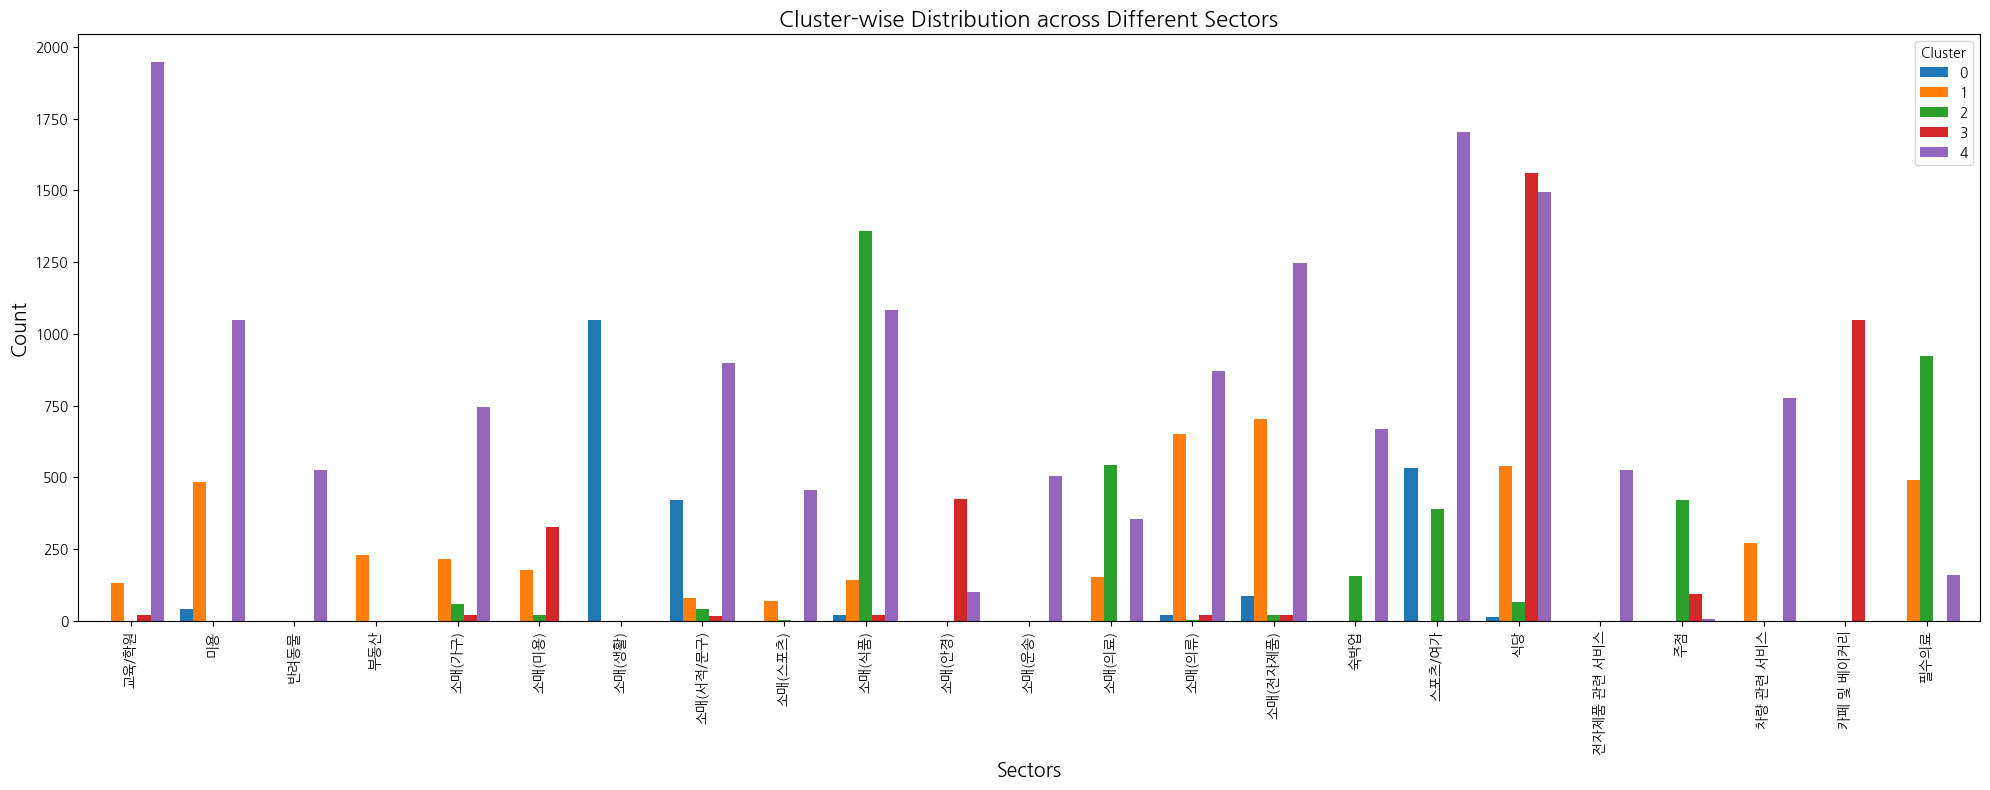

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# 데이터프레임 Transpose
df_transposed = cluster_target_distribution.T

# 시각화 생성
df_transposed.plot(kind='bar', figsize=(20, 8), width=0.8)

# 그래프 제목 및 축 레이블 설정
plt.title('Cluster-wise Distribution across Different Sectors', fontsize=16)
plt.xlabel('Sectors', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=90)  # X축 레이블이 잘 보이도록 회전
plt.legend(title='Cluster')

# 그래프 표시
plt.tight_layout()
plt.show()

In [ ]:
df_transposed['main_cluster'] = df_transposed.idxmax(axis=1)
df_transposed

Cluster,0,1,2,3,4,main_cluster
Target,,,,,,
교육/학원,0.0,133.0,0.0,21.0,1946.0,4
미용,42.0,483.0,0.0,0.0,1050.0,4
반려동물,0.0,0.0,0.0,0.0,525.0,4
부동산,0.0,229.0,0.0,0.0,0.0,1
소매(가구),0.0,216.0,60.0,21.0,745.0,4
소매(미용),0.0,177.0,21.0,326.0,1.0,3
소매(생활),1050.0,0.0,0.0,0.0,0.0,0
소매(서적/문구),423.0,80.0,43.0,16.0,900.0,4
소매(스포츠),0.0,68.0,2.0,0.0,455.0,4


업종 분류 결과

0: 소매(생활)

1: 부동산

2: 필수의료, 주점, 소매(의료), 소매(식품)

3: 카페및베이커리, 식당, 소매(안경), 소매(미용)

4: 차량관련서비스, 전자제품관련서비스, 스포츠/여가, 소매(전자제품), 소매(운송), 소매(스포츠), 소매(서적/문구), 소매(가구), 반려동물, 미용, 교육/학원

In [ ]:
df_kmeans_result = df_kmeans[['Target', 'Cluster']]

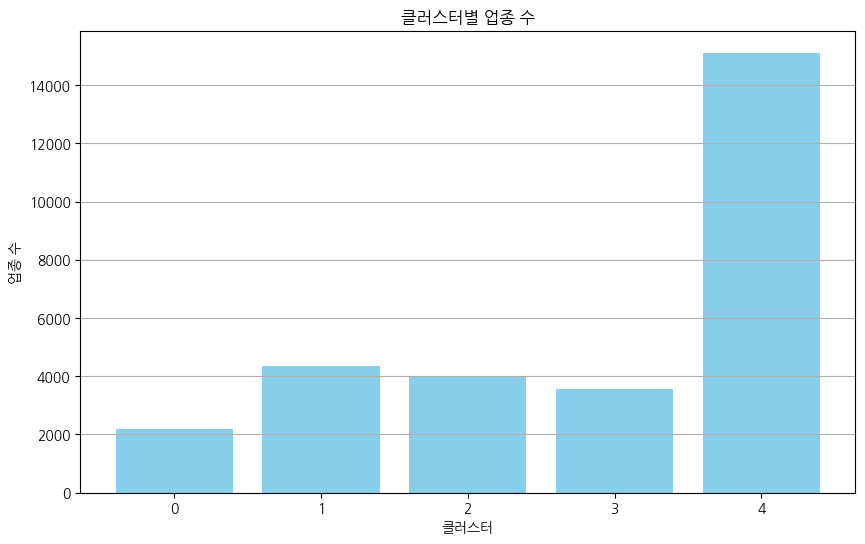

In [ ]:
# 클러스터별 업종 수 계산
cluster_counts = df_kmeans_result['Cluster'].value_counts().sort_index()

# 바 차트 시각화
plt.figure(figsize=(10, 6))
plt.bar(cluster_counts.index, cluster_counts.values, color='skyblue')
plt.xlabel('클러스터')
plt.ylabel('업종 수')
plt.title('클러스터별 업종 수')
plt.xticks(cluster_counts.index)
plt.grid(axis='y')

# 결과 출력
plt.show()

In [ ]:
df_kmeans.to_csv('/content/drive/MyDrive/DSL/EDA/df_kmeans')
df_kmeans_result.to_csv('/content/drive/MyDrive/DSL/EDA/df_kmeans_result')

## 클러스터링 (DBSACN)


umap (변수 3개로 축소)

In [ ]:
# UMAP 모델 생성 및 학습
umap_model = umap.UMAP(n_components=3, n_neighbors= 15, min_dist= 0.01, random_state=42)
X_umap = umap_model.fit_transform(df_X)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [ ]:
# numpy array -> DataFrame 변환
umap_df2 = pd.DataFrame(X_umap, columns = ['component 0', 'component 1', 'component 2'])

In [ ]:
umap_df2['업종'] = df_Y.values

차원축소 결과 시각화

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:1080: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


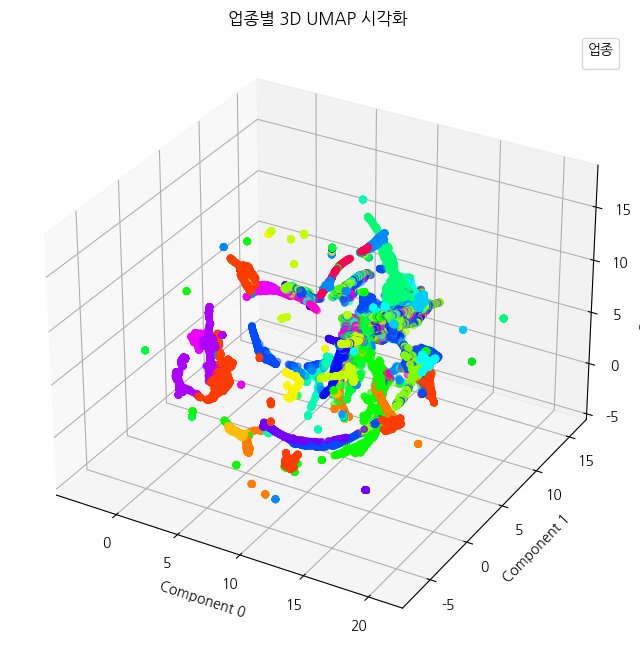

In [ ]:
# 전체 업종

import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D


# 업종을 색상으로 매핑하기 위해 seaborn의 color palette 사용
unique_categories = umap_df2['업종'].unique()
palette = sns.color_palette('hsv', len(unique_categories))
color_map = dict(zip(unique_categories, palette))

# 각 데이터 포인트에 맞는 색상 지정
colors = umap_df2['업종'].map(color_map)

# 3D scatter plot 생성
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(umap_df2['component 0'], umap_df2['component 1'], umap_df2['component 2'],
                     c=colors, marker='o')

# 축 레이블 설정
ax.set_xlabel('Component 0')
ax.set_ylabel('Component 1')
ax.set_zlabel('Component 2')

# 범례 추가
handles, labels = scatter.legend_elements(prop="colors", alpha=0.6)
legend_labels = [unique_categories[i] for i in range(len(labels))]
legend = ax.legend(handles, legend_labels, loc="upper right", title="업종")

plt.title('업종별 3D UMAP 시각화')
plt.show()

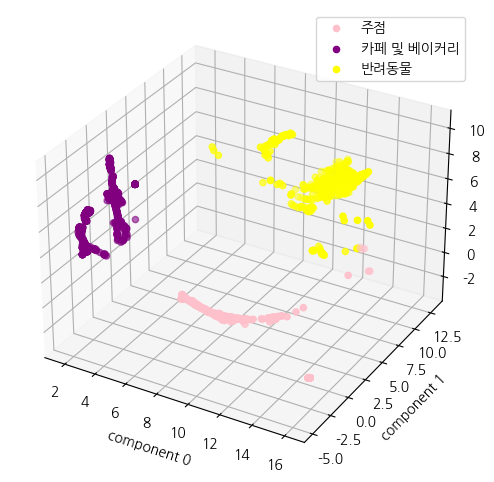

In [ ]:
# 특정 업종

from mpl_toolkits.mplot3d import Axes3D

# 3차원 그래프 세팅
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')

# class target 정보 불러오기
umap_df2['target'] = df_sum_scale['서비스_업종_코드_명']

# target 별 분리
umap_df2_0 = umap_df2[umap_df2['target'] == '주점']
umap_df2_1 = umap_df2[umap_df2['target'] == '카페 및 베이커리']
umap_df2_2 = umap_df2[umap_df2['target'] == '반려동물']

# target 별 시각화
ax.scatter(umap_df2_0['component 0'], umap_df2_0['component 1'], umap_df2_0['component 2'], color = 'pink', label = '주점')
ax.scatter(umap_df2_1['component 0'], umap_df2_1['component 1'],umap_df2_1['component 2'], color = 'purple', label = '카페 및 베이커리')
ax.scatter(umap_df2_2['component 0'], umap_df2_2['component 1'], umap_df2_2['component 2'], color = 'yellow', label = '반려동물')

ax.set_xlabel('component 0')
ax.set_ylabel('component 1')
ax.set_zlabel('component 2')
ax.legend()
plt.show()

DBSCAN 실행

In [ ]:
umap_df1 = pd.read_csv('/content/drive/MyDrive/DSL/EDA/umap.csv', index_col=0)
umap_df1 = umap_df1.drop(columns= 'Cluster')

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(umap_df1)

umap_df1['Cluster'] = dbscan_labels

In [ ]:
# 실루엣 계수로 클러스터링 성능평가

from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(umap_df1[['component 0', 'component 1', 'component 2', 'component 3']], umap_df1['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.04526225403386466


성능 매우 안좋음. 최대 0.045

# PCA (삭제)

In [ ]:
!pip install factor_analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 3.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42565 sha256=2cd7ba73acefc5bf7a6aa678e14d4cbb9f0cbdcf067aba4454209c49f624fc29
  Stored in directory: /root/.cache/pip/wheels/24/59/82/6493618e30ed1cb7a013b9e1b0c9e17de80b04dfcef4ba8a4d
Successfully built factor_analyzer


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA

# 필요한 패키지/모듈 가져오기
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
%matplotlib inline

from factor_analyzer import FactorAnalyzer

In [ ]:
#공분산 행렬
df_vif.cov()

,당월_매출_금액,당월_매출_건수,주중_매출_금액,주말_매출_금액,월요일_매출_금액,화요일_매출_금액,수요일_매출_금액,목요일_매출_금액,금요일_매출_금액,토요일_매출_금액,...,서비스_업종_코드_명_소매(의류),서비스_업종_코드_명_소매(전자제품),서비스_업종_코드_명_숙박업,서비스_업종_코드_명_스포츠/여가,서비스_업종_코드_명_식당,서비스_업종_코드_명_전자제품 관련 서비스,서비스_업종_코드_명_주점,서비스_업종_코드_명_차량 관련 서비스,서비스_업종_코드_명_카페 및 베이커리,서비스_업종_코드_명_필수의료
당월_매출_금액,1.000034,0.545653,0.979588,0.882129,0.959939,0.962836,0.969463,0.973733,0.986496,0.907141,...,0.011427,-0.000063,-0.008917,-0.025717,0.023370,-0.006036,-0.000623,-0.008581,-0.000049,0.015934
당월_매출_건수,0.545653,1.000034,0.532150,0.486815,0.520025,0.523051,0.529563,0.532775,0.531130,0.484144,...,-0.007168,-0.017488,-0.010352,-0.024511,0.021815,-0.006886,-0.003616,-0.013159,0.029598,0.001547
주중_매출_금액,0.979588,0.532150,1.000034,0.769321,0.989712,0.992450,0.992628,0.992840,0.988870,0.807133,...,0.005969,0.001616,-0.009331,-0.026706,0.021762,-0.006173,-0.001245,-0.008418,-0.000404,0.020647
주말_매출_금액,0.882129,0.486815,0.769321,1.000034,0.731093,0.733879,0.754512,0.767572,0.817402,0.990928,...,0.022314,-0.003985,-0.006468,-0.019139,0.023263,-0.004714,0.000936,-0.007542,0.000791,0.002257
월요일_매출_금액,0.959939,0.520025,0.989712,0.731093,1.000034,0.983652,0.979335,0.975119,0.969302,0.771085,...,0.004295,0.003237,-0.009437,-0.026657,0.016407,-0.006208,-0.002051,-0.008449,-0.001021,0.025757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
서비스_업종_코드_명_전자제품 관련 서비스,-0.006036,-0.006886,-0.006173,-0.004714,-0.006208,-0.006183,-0.006139,-0.006072,-0.006011,-0.004912,...,-0.000962,-0.001279,-0.000507,-0.001613,-0.002258,0.017639,-0.000323,-0.000643,-0.000645,-0.000968
서비스_업종_코드_명_주점,-0.000623,-0.003616,-0.001245,0.000936,-0.002051,-0.001528,-0.001222,-0.001017,-0.000484,0.000800,...,-0.000962,-0.001279,-0.000507,-0.001613,-0.002258,-0.000323,0.017639,-0.000643,-0.000645,-0.000968
서비스_업종_코드_명_차량 관련 서비스,-0.008581,-0.013159,-0.008418,-0.007542,-0.008449,-0.008459,-0.008277,-0.008256,-0.008291,-0.006867,...,-0.001918,-0.002550,-0.001011,-0.003217,-0.004504,-0.000643,-0.000643,0.034538,-0.001287,-0.001930
서비스_업종_코드_명_카페 및 베이커리,-0.000049,0.029598,-0.000404,0.000791,-0.001021,-0.000463,-0.000036,-0.000089,-0.000420,-0.000404,...,-0.001923,-0.002558,-0.001014,-0.003226,-0.004517,-0.000645,-0.000645,-0.001287,0.034633,-0.001936


In [ ]:
# PCA 진행 (고유 분해를 통해 고유값과 고유 벡터 계산)
pca = PCA(random_state=312)
X_p = pca.fit_transform(df_vif)

In [ ]:
# Eigen value
fa = FactorAnalyzer(n_factors=df_vif.shape[1], rotation=None) # rotation:
fa.fit(df_vif)

ev, v = fa.get_eigenvalues()
print('eigen value:', ev,'\n', "number of eigen value:", len(ev))

print('적합한 PC 개수:', sum(ev >= 1))

eigen value: [ 3.25829006e+01  1.00198714e+01  3.56508293e+00  1.96274422e+00
  1.63502012e+00  1.47874085e+00  1.42999887e+00  1.22470628e+00
  1.20066562e+00  1.10172802e+00  1.08120982e+00  1.06099161e+00
  1.05911600e+00  1.05011106e+00  1.04631914e+00  1.03950320e+00
  1.03524860e+00  1.03400071e+00  1.02043828e+00  1.01916812e+00
  1.01842196e+00  1.01338779e+00  9.76029866e-01  8.90825197e-01
  8.09494872e-01  7.92183172e-01  7.18102631e-01  6.64797361e-01
  5.57434505e-01  4.75343010e-01  3.99828220e-01  3.05326531e-01
  3.03918548e-01  2.56795298e-01  1.95177585e-01  1.32726455e-01
  1.25700106e-01  1.11665234e-01  8.69239986e-02  8.03088531e-02
  6.55780970e-02  5.51564382e-02  4.83778779e-02  3.75036739e-02
  3.51538926e-02  2.69136551e-02  2.39682634e-02  1.64261918e-02
  1.61497026e-02  1.56983599e-02  1.42392124e-02  1.22027951e-02
  1.14607695e-02  1.04094438e-02  9.75654282e-03  8.05302934e-03
  6.19880080e-03  5.06498420e-03  4.49544502e-03  3.80498694e-03
  3.30083118

아이젠밸류 기준 PC가 너무 많음.

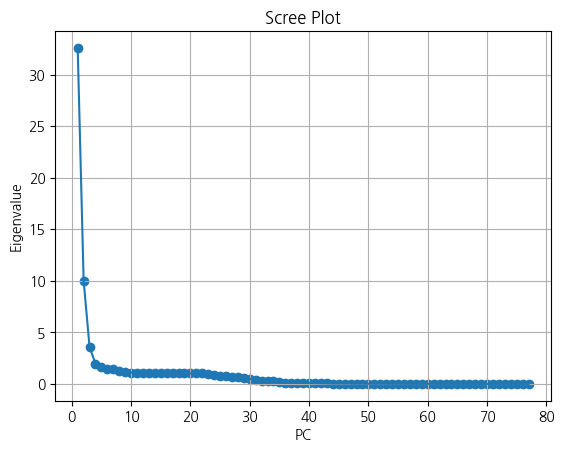

In [ ]:
# 시각화 1
plt.scatter(range(1, df_vif.shape[1]+1),ev)
plt.plot(range(1,df_vif.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('PC')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

 PC 4개일 때

In [ ]:
# PCA 진행
pca = PCA(n_components=3,random_state=312) # n_components를 재설정
pca_out = pca.fit(df_vif)
X_p = pca.fit_transform(df_vif)

In [ ]:
# 각 PC를 이루는 변수들의 조합 구성 (25X6): Kaiser rule 기준
# PCA의 결과(변수별 계수)는 자세한 해석 불가 (세로로 간단하게 파악만 가능)
  # 세로로 해석하면 주성분(PC)에서 어떤 변수(A1,A2...)들이 높게 나왔는지 간략한 파악 가능

PCA_result = pd.DataFrame(pca.components_.T,
             columns = ['PC1','PC2','PC3'],
             index=df_vif.columns)

<Axes: >

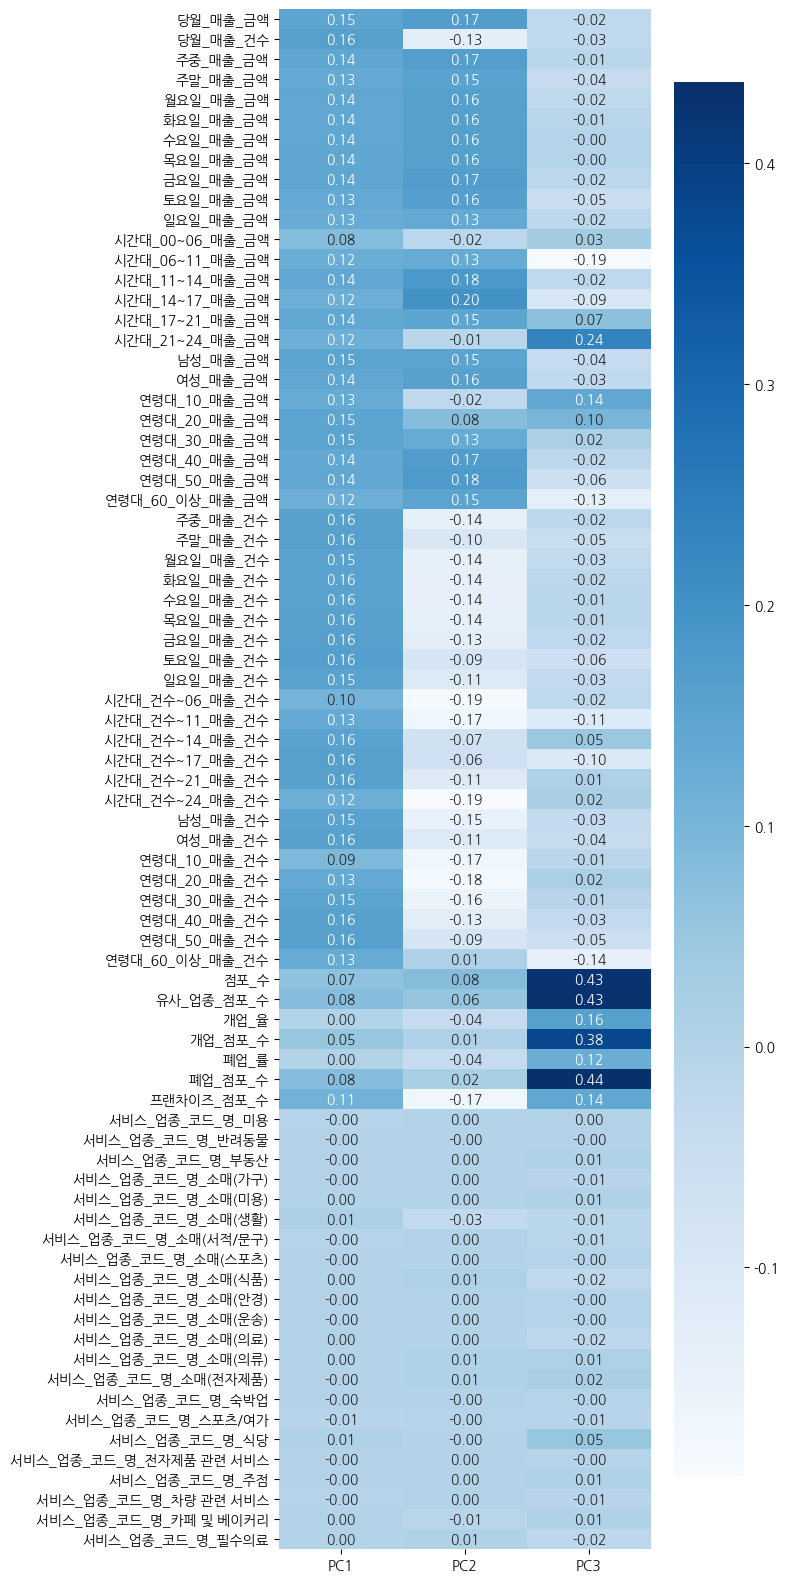

In [ ]:
# 시각화 1)
plt.figure(figsize=(6,20))
sns.heatmap(PCA_result, cmap="Blues", annot=True, fmt='.2f')

In [ ]:
df_vif.columns

Index(['당월_매출_금액', '당월_매출_건수', '주중_매출_금액', '주말_매출_금액', '월요일_매출_금액',
       '화요일_매출_금액', '수요일_매출_금액', '목요일_매출_금액', '금요일_매출_금액', '토요일_매출_금액',
       '일요일_매출_금액', '시간대_00~06_매출_금액', '시간대_06~11_매출_금액', '시간대_11~14_매출_금액',
       '시간대_14~17_매출_금액', '시간대_17~21_매출_금액', '시간대_21~24_매출_금액', '남성_매출_금액',
       '여성_매출_금액', '연령대_10_매출_금액', '연령대_20_매출_금액', '연령대_30_매출_금액',
       '연령대_40_매출_금액', '연령대_50_매출_금액', '연령대_60_이상_매출_금액', '주중_매출_건수',
       '주말_매출_건수', '월요일_매출_건수', '화요일_매출_건수', '수요일_매출_건수', '목요일_매출_건수',
       '금요일_매출_건수', '토요일_매출_건수', '일요일_매출_건수', '시간대_건수~06_매출_건수',
       '시간대_건수~11_매출_건수', '시간대_건수~14_매출_건수', '시간대_건수~17_매출_건수',
       '시간대_건수~21_매출_건수', '시간대_건수~24_매출_건수', '남성_매출_건수', '여성_매출_건수',
       '연령대_10_매출_건수', '연령대_20_매출_건수', '연령대_30_매출_건수', '연령대_40_매출_건수',
       '연령대_50_매출_건수', '연령대_60_이상_매출_건수', '점포_수', '유사_업종_점포_수', '개업_율',
       '개업_점포_수', '폐업_률', '폐업_점포_수', '프랜차이즈_점포_수', '서비스_업종_코드_명_미용',
       '서비스_업종_코드_명_반려동물', '서비스_업종_코드_명_부동산', '서비스_업종_코드_명_소매(가구)',
       '서비스_업종_코드_명_소

In [ ]:
df_vif['당월_매출_금액', '당월_매출_건수', '주중_매출_금액', '주말_매출_금액', ]

#  FA (삭제)

분석 전 검정

- 3) i) KMO Test (Kaiser-Meyer-Olkin Test)
  - 변수들간 상관관계가 다른 변수에 의해 잘 설명되는 정도를 나타내는 값 (관측된 모든 변수 간 분산 비율)
    - 입력 변수들 간 상관계수제곱들과 편상관계수제곱들을 모두 더한 값 중에서 상관계수제곱의 합이 차지하는 비율 값
  - 이 값이 작으면 요인분석을 위한 변수들의 선정이 적절하지 못하다는 것을 의미
  - 일반적으로 0.9 이상이면 아주 좋음, 0.8 이상이면 꽤 좋음, 0.7 이상이면 적당함, 0.6 이상이면 평범함, 0.5 미만이면 안 좋음
  - 변수가 최소 3개 이상일 경우 사용 가능

In [ ]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all, kmo_model = calculate_kmo(df_vif)
kmo_model # 0.8 이상이므로 꽤 좋음

/usr/local/lib/python3.10/dist-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


0.8049849587571624

In [ ]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value, p_value = calculate_bartlett_sphericity(df_vif)
chi_square_value, p_value # p-value < 0.05 --> 귀무가설 기각

(14398594.789970955, 0.0)

원 변수로 하면  FA 불가.